In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [3]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target.reshape(-1, 1)  

print("fisrt 5 of X  :\n", X[:5])
print("Categories :\n", y[:5])


fisrt 5 of X  :
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Categories :
 [[0]
 [0]
 [0]
 [0]
 [0]]


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

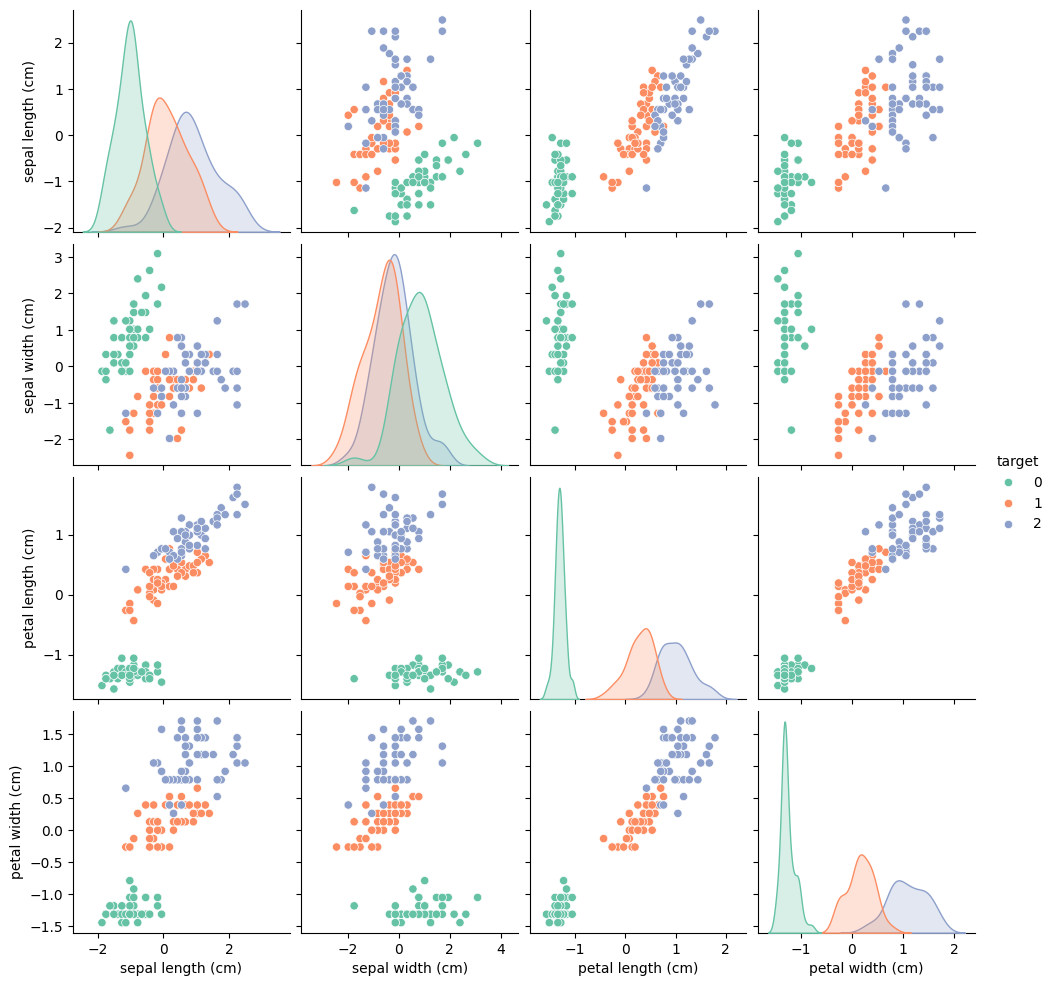

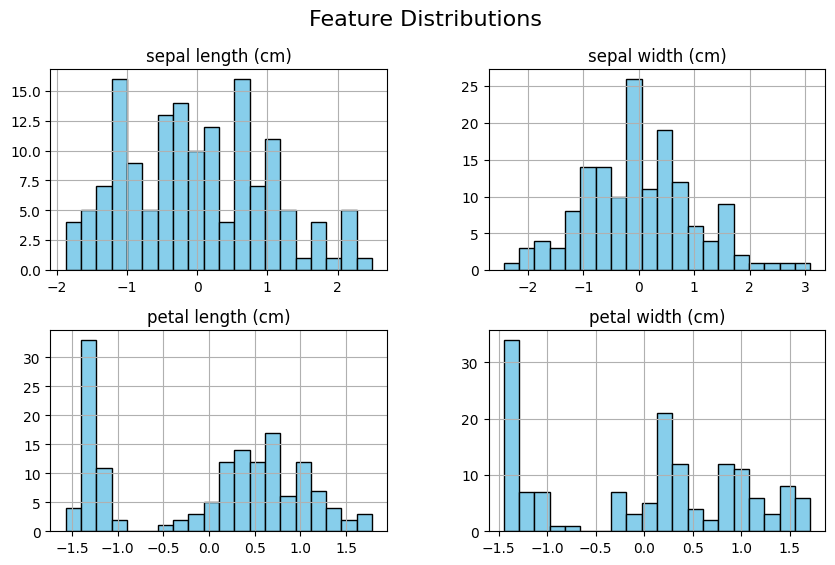

In [ ]:
import seaborn as sns 
import pandas as pd

feature_names = iris.feature_names
df = pd.DataFrame(X_scaled, columns=feature_names)
df["target"] = y.flatten()

sns.pairplot(df, hue="target", diag_kind="kde", palette="Set2")
plt.show()


df[feature_names].hist(bins=20, figsize=(10, 6), color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [13]:
class MLP:
    def __init__(self, in_dim, hidden_dim, out_dim):
        limit1 = np.sqrt(6/(in_dim+hidden_dim))
        limit2 = np.sqrt(6/(hidden_dim+out_dim))
        self.W1 = np.random.uniform(-limit1, limit1, (in_dim, hidden_dim))
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.uniform(-limit2, limit2, (hidden_dim, out_dim))
        self.b2 = np.zeros((1, out_dim))

    def forward(self, X):
        self.X = X
        self.Z1 = X @ self.W1 + self.b1
        self.A1 = np.maximum(0, self.Z1)  # ReLU
        Z2 = self.A1 @ self.W2 + self.b2
        exp = np.exp(Z2 - np.max(Z2, axis=1, keepdims=True))
        self.probs = exp / exp.sum(axis=1, keepdims=True)
        return self.probs

    def loss(self, Y_onehot):
        m = Y_onehot.shape[0]
        return -np.sum(Y_onehot * np.log(self.probs + 1e-12)) / m

    def backward(self, Y_onehot):
        m = Y_onehot.shape[0]
        dZ2 = (self.probs - Y_onehot) / m
        dW2 = self.A1.T @ dZ2
        db2 = dZ2.sum(axis=0, keepdims=True)
        dA1 = dZ2 @ self.W2.T
        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = self.X.T @ dZ1
        db1 = dZ1.sum(axis=0, keepdims=True)
        return {"W1": dW1, "b1": db1, "W2": dW2, "b2": db2}

    def step(self, grads, lr=0.1):
        self.W1 -= lr * grads["W1"]
        self.b1 -= lr * grads["b1"]
        self.W2 -= lr * grads["W2"]
        self.b2 -= lr * grads["b2"]

    def predict(self, X):
        probs = self.forward(X)
        return probs.argmax(axis=1)


In [14]:
in_dim = X_scaled.shape[1] 
hidden_dim = 10
out_dim = y_onehot.shape[1]  
lr = 0.1
epochs = 500

model = MLP(in_dim, hidden_dim, out_dim)

for epoch in range(1, epochs + 1):
    probs = model.forward(X_scaled)
    loss = model.loss(y_onehot)
    grads = model.backward(y_onehot)
    model.step(grads, lr)
    if epoch % 100 == 0 or epoch == 1:
        preds = model.predict(X_scaled)
        acc = np.mean(preds == y.flatten())
        print(f"Epoch {epoch:3d} | loss={loss:.4f} | acc={acc*100:.1f}%")

print(" final result :", model.predict(X_scaled))
print(" actual result :", y.flatten())


Epoch   1 | loss=1.2389 | acc=12.7%
Epoch 100 | loss=0.2375 | acc=92.7%
Epoch 200 | loss=0.1187 | acc=97.3%
Epoch 300 | loss=0.0849 | acc=97.3%
Epoch 400 | loss=0.0705 | acc=97.3%
Epoch 500 | loss=0.0625 | acc=97.3%
 final result : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
 actual result : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
